<a href="https://colab.research.google.com/github/Mickey5480/Data110-Fall2025/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load the penguins dataset from seaborn
penguins = sns.load_dataset('penguins')

# Display the first few rows of the dataset
print(penguins.head())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


In [28]:
penguins.info()


penguins.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


#Task 1: Create a Similar Plot for Bill Length vs. Flipper Length

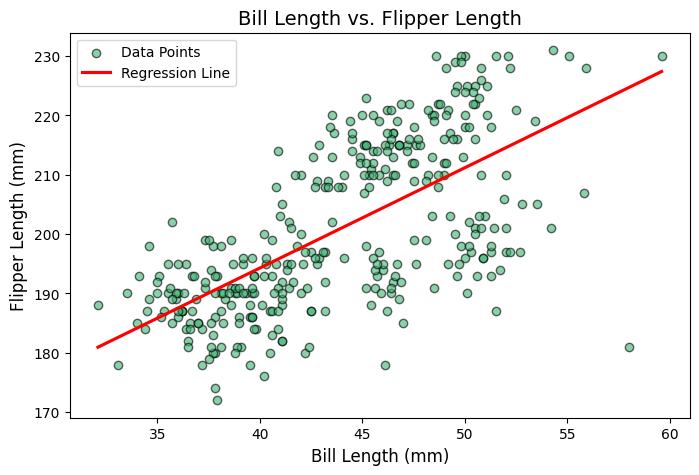

In [29]:
# Set figure size
plt.figure(figsize=(8, 5))

# Scatter plot (manually colored)
plt.scatter(penguins["bill_length_mm"], penguins["flipper_length_mm"],
            color="mediumseagreen", alpha=0.6, edgecolors="black", label="Data Points")

# Regression line
sns.regplot(data=penguins, x="bill_length_mm", y="flipper_length_mm",
            scatter=False, color="red", ci=None, label="Regression Line")

# Labels and title
plt.xlabel("Bill Length (mm)", fontsize=12)
plt.ylabel("Flipper Length (mm)", fontsize=12)
plt.title("Bill Length vs. Flipper Length", fontsize=14)

# Legend
plt.legend()

# Show plot
plt.show()

# Task 2: Create a Similar Plot for Bill Length vs. Body Mass


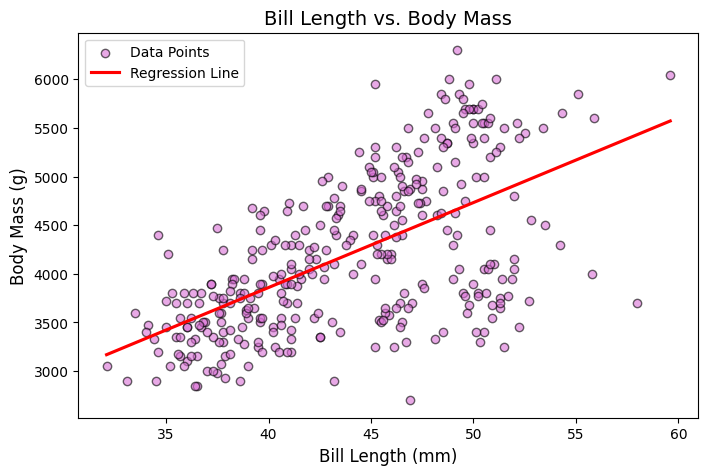

In [30]:
# Set figure size
plt.figure(figsize=(8, 5))

# Scatter plot (manually colored)
plt.scatter(penguins["bill_length_mm"], penguins["body_mass_g"],
            color="orchid", alpha=0.6, edgecolors="black", label="Data Points")

# Regression line
sns.regplot(data=penguins, x="bill_length_mm", y="body_mass_g",
            scatter=False, color="red", ci=None, label="Regression Line")

# Labels and title
plt.xlabel("Bill Length (mm)", fontsize=12)
plt.ylabel("Body Mass (g)", fontsize=12)
plt.title("Bill Length vs. Body Mass", fontsize=14)

# Legend
plt.legend()

# Show plot
plt.show()

In [31]:
penguins_adeile=penguins[penguins['species']=='Adelie']
penguins['species'].unique()


array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

# Task 3: Make 3 subplots — scatter + regression — for each species separately


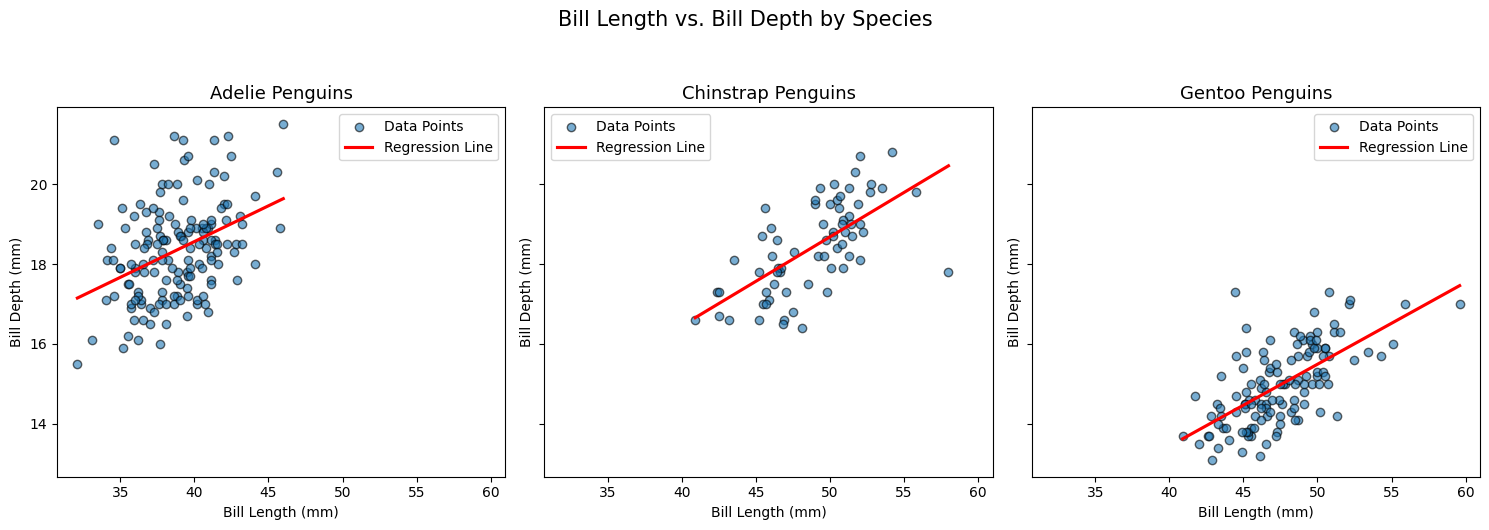

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the unique species in the dataset
species_list = penguins["species"].unique()

# Set up the subplots — 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

# Loop through each species and create a scatter + regression plot
for i, species in enumerate(species_list):
    # Filter data for the current species
    data = penguins[penguins["species"] == species]

    # Scatter plot
    axes[i].scatter(data["bill_length_mm"], data["bill_depth_mm"],
                    alpha=0.6, edgecolors="black", label="Data Points")

    # Regression line
    sns.regplot(data=data, x="bill_length_mm", y="bill_depth_mm",
                scatter=False, color="red", ci=None, ax=axes[i], label="Regression Line")

    # Titles and labels
    axes[i].set_title(f"{species} Penguins", fontsize=13)
    axes[i].set_xlabel("Bill Length (mm)")
    axes[i].set_ylabel("Bill Depth (mm)")
    axes[i].legend()

# Adjust layout
plt.suptitle("Bill Length vs. Bill Depth by Species", fontsize=15, y=1.05)
plt.tight_layout()
plt.show()

In [33]:
# Check for missing values
print(penguins.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [34]:
# Filter penguins by species and select bill_length_mm for Adelie
adelie_bill_length = penguins[penguins['species'] == 'Adelie']['bill_length_mm']

# Display the result
print(adelie_bill_length)

0      39.1
1      39.5
2      40.3
3       NaN
4      36.7
       ... 
147    36.6
148    36.0
149    37.8
150    36.0
151    41.5
Name: bill_length_mm, Length: 152, dtype: float64


Task 4: Pairplot Remix

In [35]:
penguins_clean = penguins.dropna(subset=['bill_length_mm', 'bill_depth_mm',
                                         'flipper_length_mm', 'body_mass_g', 'sex'])


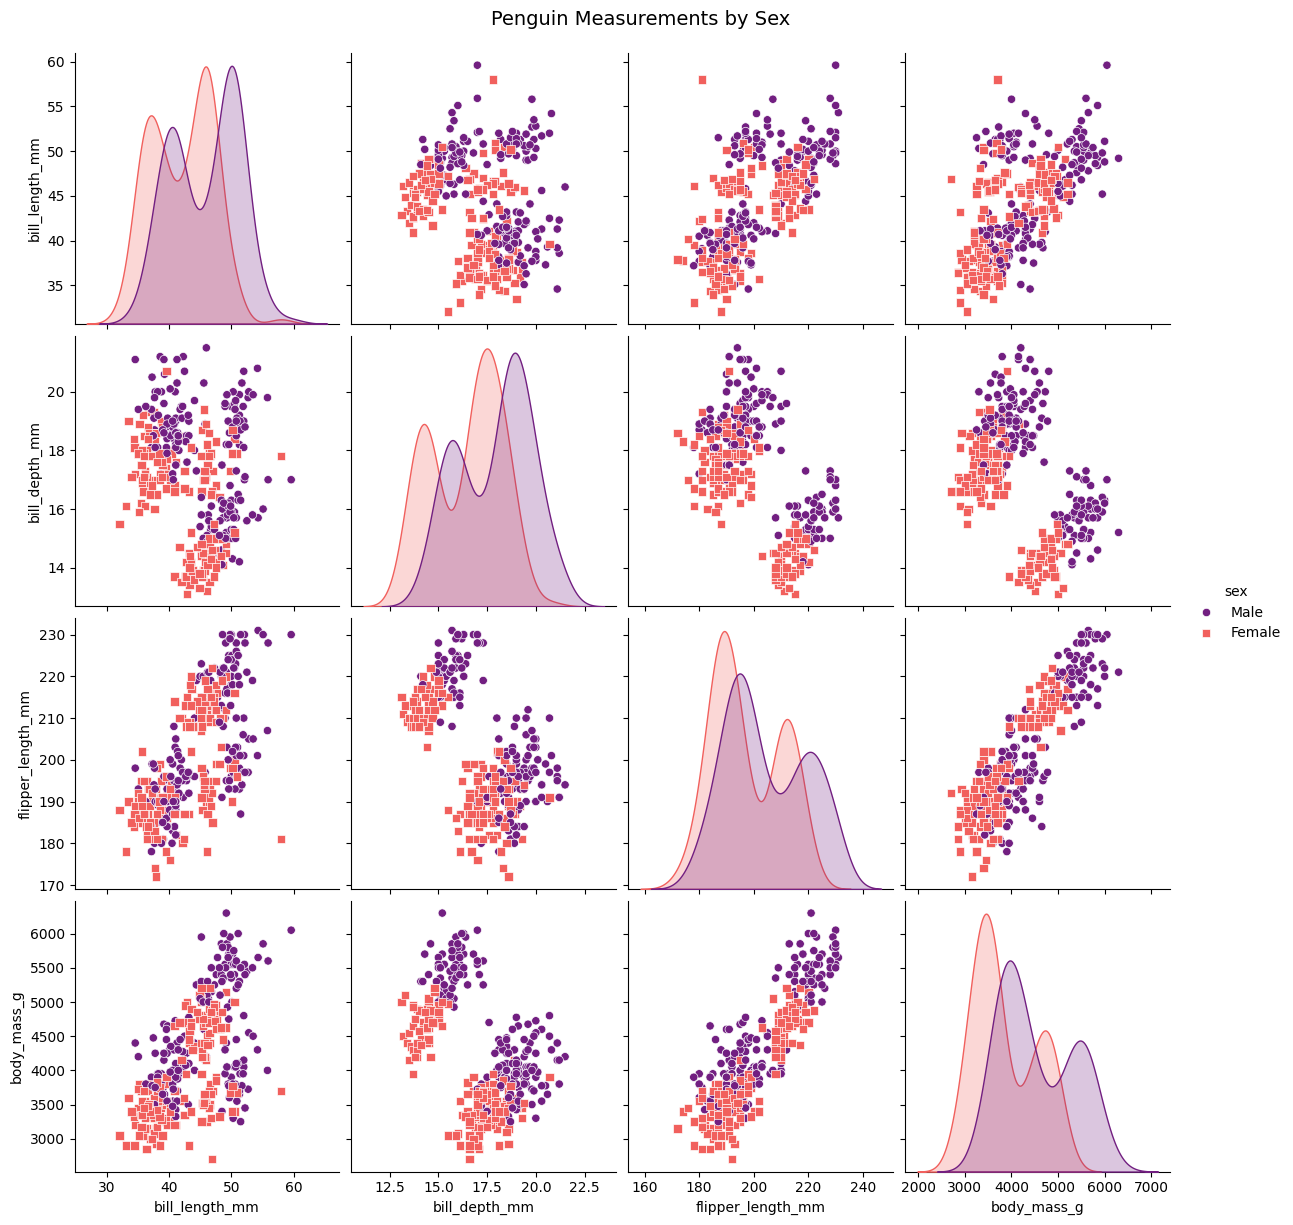

In [36]:
sns.pairplot(
    penguins_clean,
    hue="sex",                      # different column for hue
    diag_kind="kde",                # diagonal plots are KDEs
    markers=["o", "s"],             # different markers for each hue category
    palette="magma",                # new color palette
    height=3.0                      # make plots a bit bigger
)

plt.suptitle("Penguin Measurements by Sex", y=1.02, fontsize=14)
plt.show()

Task 5: Create a 2×2 Grid with Mixed Plot Types

/tmp/ipython-input-1852117099.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1852117099.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


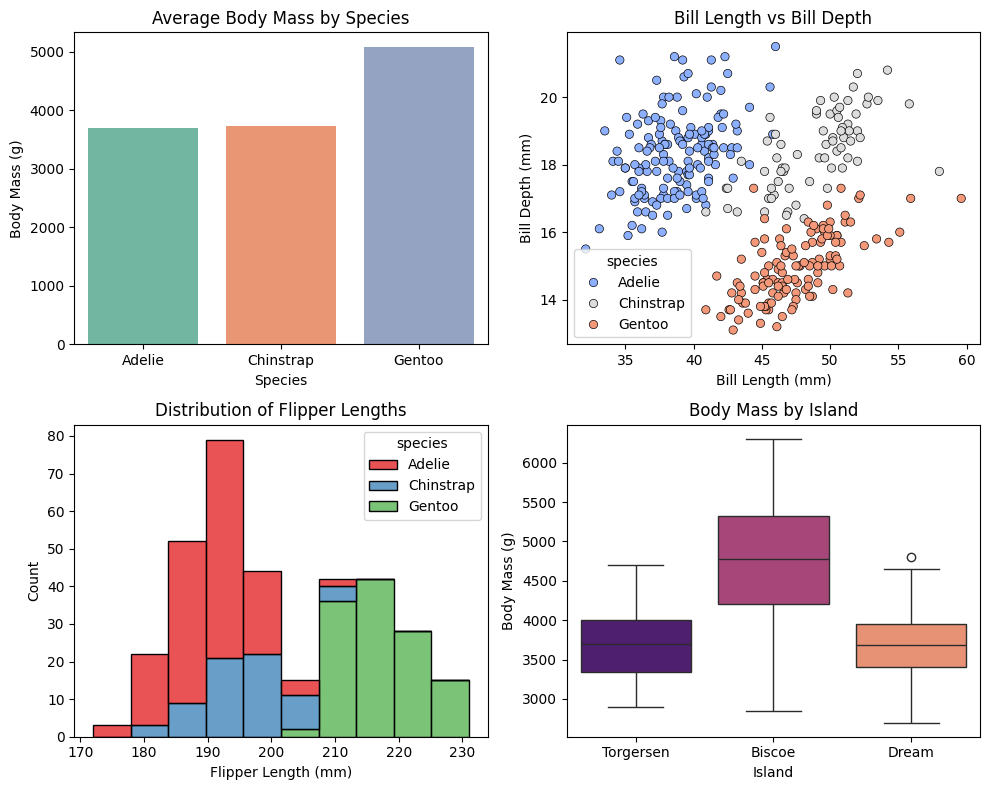

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
sns.barplot(
    data=penguins,
    x="species",
    y="body_mass_g",
    ax=axes[0, 0],
    palette="Set2",
    errorbar=None
)
axes[0, 0].set_title("Average Body Mass by Species")
axes[0, 0].set_xlabel("Species")
axes[0, 0].set_ylabel("Body Mass (g)")

# -----------------------------
# (Top-right) Scatter plot: Bill length vs Bill depth
# -----------------------------
sns.scatterplot(
    data=penguins,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    palette="coolwarm",
    ax=axes[0, 1],
    edgecolor="black"
)
axes[0, 1].set_title("Bill Length vs Bill Depth")
axes[0, 1].set_xlabel("Bill Length (mm)")
axes[0, 1].set_ylabel("Bill Depth (mm)")

# -----------------------------
# (Bottom-left) Histogram: Flipper length by species
# -----------------------------
sns.histplot(
    data=penguins,
    x="flipper_length_mm",
    hue="species",
    multiple="stack",
    palette="Set1",
    ax=axes[1, 0]
)
axes[1, 0].set_title("Distribution of Flipper Lengths")
axes[1, 0].set_xlabel("Flipper Length (mm)")
axes[1, 0].set_ylabel("Count")

# -----------------------------
# (Bottom-right) Box plot: Body mass by island
# -----------------------------
sns.boxplot(
    data=penguins,
    x="island",
    y="body_mass_g",
    palette="magma",
    ax=axes[1, 1]
)
axes[1, 1].set_title("Body Mass by Island")
axes[1, 1].set_xlabel("Island")
axes[1, 1].set_ylabel("Body Mass (g)")

# Adjust layout and save figure
plt.tight_layout()
plt.savefig("penguins_mixed_plots.png", dpi=150)
plt.show()


Task 6 – Pie Chart: Distribution of Penguin Species

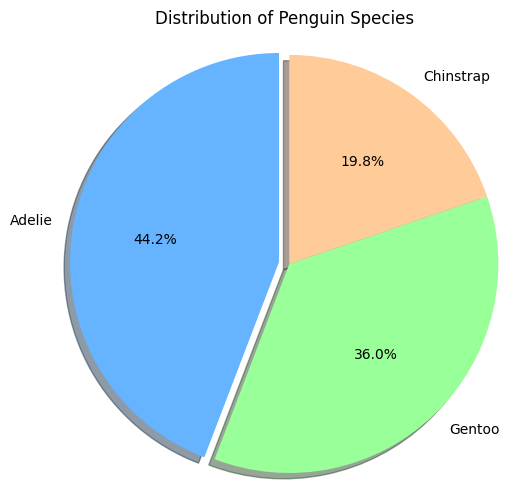

In [38]:
species_counts = penguins["species"].value_counts()

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    species_counts,
    labels=species_counts.index,      # species names
    autopct='%1.1f%%',                # show % with 1 decimal
    startangle=90,                    # start from top
    explode=(0.05, 0, 0),             # slightly separate first slice
    shadow=True,
    colors=["#66b3ff", "#99ff99", "#ffcc99"]
)

# Make it circular and add title
plt.axis('equal')
plt.title("Distribution of Penguin Species")
plt.show()

K-Means Clustering on the Penguins Dataset

/tmp/ipython-input-8632784.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_clean["cluster"] = kmeans.fit_predict(X_scaled)


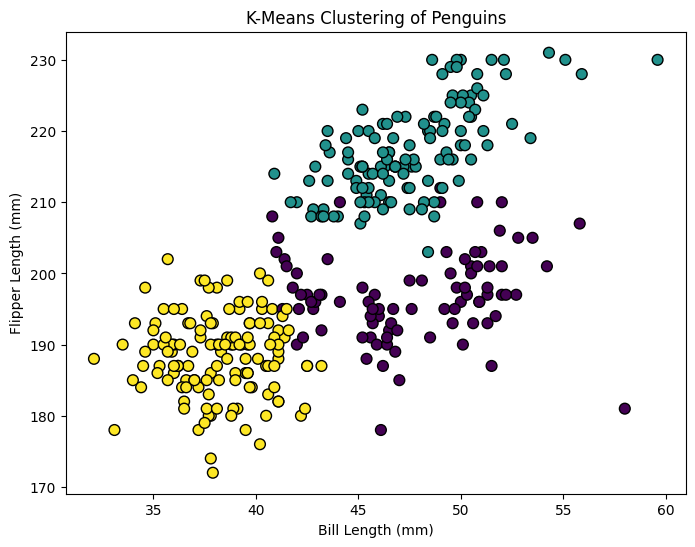

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# Drop missing values for numeric columns
penguins_clean = penguins.dropna(subset=["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"])

# Select only numerical features
X = penguins_clean[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
penguins_clean["cluster"] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(
    penguins_clean["bill_length_mm"],
    penguins_clean["flipper_length_mm"],
    c=penguins_clean["cluster"],
    cmap="viridis",
    s=60,
    edgecolor="black"
)
plt.title("K-Means Clustering of Penguins")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Flipper Length (mm)")
plt.show()